In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium matplotlib
import folium
!pip install geopy
from geopy.geocoders import Nominatim

In [ ]:
m = folium.Map(zoom_start = 6)

existing_dcs = [
    {'latitude': 35.393528, 'longitude': - 119.043732, 'name': 'Bakersfield, CA'},
    {'latitude': 38.2805, 'longitude': -104.4672, 'name': 'Pueblo, CO'},
    {'latitude': 44.979595, 'longitude': -93.276566, 'name': 'Woodbury, MN'},
    {'latitude': 40.028900, 'longitude': -77.590698, 'name': 'Chambersberg, PN'}
]

for location in existing_dcs:
    new_marker = folium.Marker(
        location=[location['latitude'], location['longitude']],
        popup=location['name'],
        icon=folium.Icon(color='red')
    )

    new_marker.add_to(m)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')

In [ ]:
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


In [ ]:
df2 = df.drop(['guest_id','country','geographic_loc','state'],axis =1)

In [ ]:
df2.head(5)

,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,latitude,longitude
0,12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,41.934523,-114.793454
1,17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,28.411406,-98.053030
2,9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,37.861983,-79.324797
3,3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,33.101184,-115.570116
4,14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,49.022389,-123.155575


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

numerical_cols = ['order_frequency','returns_rate']
# scaler = StandardScaler()
# df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


In [ ]:
categorical_cols = ['shipping_preferences','promotional_response']
# encoder = LabelEncoder()
# df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])
encoder = OrdinalEncoder()
df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])


In [ ]:
# df2[categorical_cols]

In [ ]:
combined_features = numerical_cols + categorical_cols
combined_features

['order_frequency',
 'returns_rate',
 'shipping_preferences',
 'promotional_response']

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7173, ncost: 3427858.7038985826
Run: 1, iteration: 2/100, moves: 2939, ncost: 3374047.66928442
Run: 1, iteration: 3/100, moves: 3580, ncost: 3271684.9081679774
Run: 1, iteration: 4/100, moves: 4204, ncost: 3143322.7568813493
Run: 1, iteration: 5/100, moves: 3638, ncost: 3058186.2246752386
Run: 1, iteration: 6/100, moves: 2195, ncost: 3034473.771800269
Run: 1, iteration: 7/100, moves: 1118, ncost: 3028627.7402734538
Run: 1, iteration: 8/100, moves: 669, ncost: 3026662.712929052
Run: 1, iteration: 9/100, moves: 416, ncost: 3025876.4477353496
Run: 1, iteration: 10/100, moves: 222, ncost: 3025657.5175052783
Run: 1, iteration: 11/100, moves: 128, ncost: 3025589.5565420063
Run: 1, iteration: 12/100, moves: 57, ncost: 3025578.8652435956
Run: 1, iteration: 13/100, moves: 14, ncost: 3025577.5541569255
Run: 1,

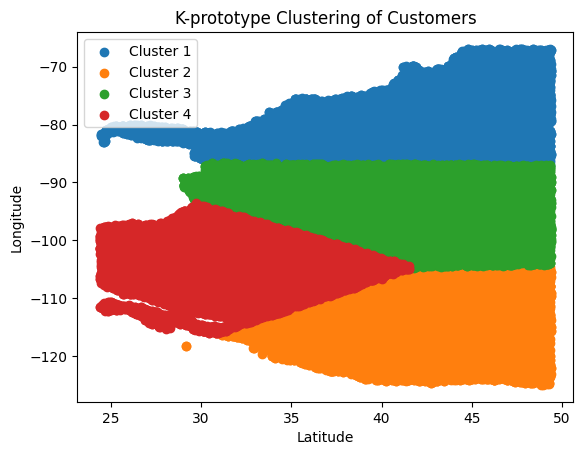

In [ ]:
selected_features1 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features1].values, categorical=[4])
df2['cluster1'] = clusters

for cluster_num in range(k):
    cluster_data = df2[df2['cluster1'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'blue'),
      popup = f"{location_name}"
  ).add_to(m)

m.save('map1.html')
m

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7849, ncost: 3201156.2483378123
Run: 1, iteration: 2/100, moves: 3737, ncost: 3118758.836755769
Run: 1, iteration: 3/100, moves: 2325, ncost: 3084050.492039387
Run: 1, iteration: 4/100, moves: 1669, ncost: 3066547.3766174037
Run: 1, iteration: 5/100, moves: 1265, ncost: 3056502.5856372565
Run: 1, iteration: 6/100, moves: 909, ncost: 3050883.035098013
Run: 1, iteration: 7/100, moves: 780, ncost: 3046815.5812063757
Run: 1, iteration: 8/100, moves: 741, ncost: 3043071.675594111
Run: 1, iteration: 9/100, moves: 787, ncost: 3038419.5829799296
Run: 1, iteration: 10/100, moves: 947, ncost: 3031985.5449079364
Run: 1, iteration: 11/100, moves: 774, ncost: 3028419.4046111675
Run: 1, iteration: 12/100, moves: 537, ncost: 3026846.13092644
Run: 1, iteration: 13/100, moves: 362, ncost: 3026133.185452914
Run: 1, it

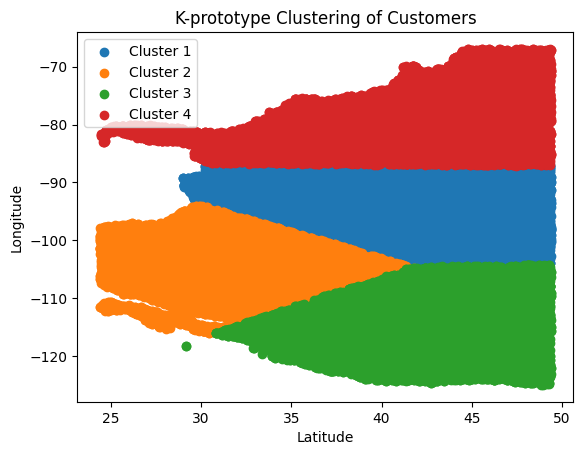

In [ ]:
selected_features2 = ['latitude','longitude','order_frequency','returns_rate','promotional_response']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features2].values, categorical=[4])
df2['cluster2'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster2'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'green'),
      popup = f"{location_name}"
  ).add_to(m)

m.save('map2.html')
m

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7774, ncost: 3178707.9574200604
Run: 1, iteration: 2/100, moves: 2056, ncost: 3157767.3030936695
Run: 1, iteration: 3/100, moves: 1119, ncost: 3150202.6678486774
Run: 1, iteration: 4/100, moves: 863, ncost: 3145279.3569588955
Run: 1, iteration: 5/100, moves: 782, ncost: 3141006.464749096
Run: 1, iteration: 6/100, moves: 811, ncost: 3136059.9403983564
Run: 1, iteration: 7/100, moves: 940, ncost: 3129966.8023244366
Run: 1, iteration: 8/100, moves: 763, ncost: 3126623.9659134615
Run: 1, iteration: 9/100, moves: 522, ncost: 3125184.319218408
Run: 1, iteration: 10/100, moves: 359, ncost: 3124492.1512361546
Run: 1, iteration: 11/100, moves: 195, ncost: 3124276.493863116
Run: 1, iteration: 12/100, moves: 101, ncost: 3124231.391980102
Run: 1, iteration: 13/100, moves: 37, ncost: 3124224.2442138903
Run: 1, it

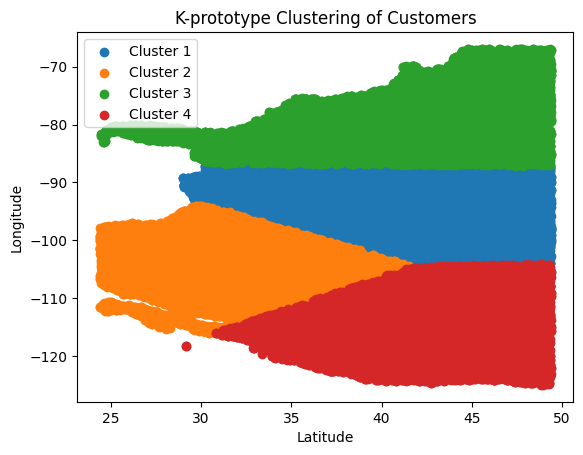

In [ ]:
selected_features3 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences','promotional_response']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features3].values, categorical=[4,5])

#scatterplot
df2['cluster3'] = clusters
for cluster_num in range(k):
  cluster_data = df2[df2['cluster3'] == cluster_num]
  plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'orange'),
      popup = f"{location_name}"
  ).add_to(m)

m.save(map3.html)
m

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6002, ncost: 3083799.388217266
Run: 1, iteration: 2/100, moves: 2630, ncost: 3058764.811075833
Run: 1, iteration: 3/100, moves: 822, ncost: 3056391.297564379
Run: 1, iteration: 4/100, moves: 236, ncost: 3056180.0430217953
Run: 1, iteration: 5/100, moves: 72, ncost: 3056156.8291981514
Run: 1, iteration: 6/100, moves: 22, ncost: 3056153.80547543
Run: 1, iteration: 7/100, moves: 11, ncost: 3056153.186024733
Run: 1, iteration: 8/100, moves: 4, ncost: 3056153.01908803
Run: 1, iteration: 9/100, moves: 0, ncost: 3056153.01908803
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 10045, ncost: 3517908.5305540133
Run: 2, iteration: 2/100, moves: 5419, ncost: 3320513.2736363793
Run: 2, iteration: 3/100, moves: 3937, ncost: 3206096.7112225047
Run: 2,

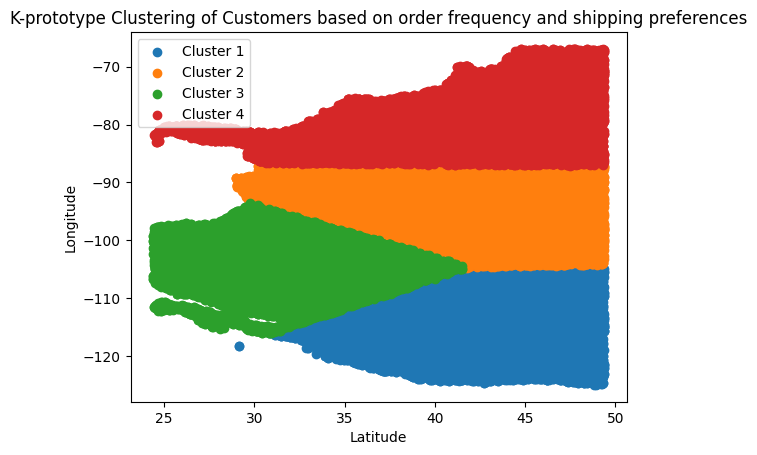

In [ ]:
selected_features4 = ['latitude','longitude','order_frequency','shipping_preferences']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features4].values, categorical=[3])
df2['cluster4'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster4'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency and shipping preferences')
plt.legend()
plt.show()

In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'darkgreen'),
      popup = f"{location_name}"
  ).add_to(m)

m.save('m4.html')
m

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9106, ncost: 3583597.078277473
Run: 1, iteration: 2/100, moves: 5926, ncost: 3398553.8908610186
Run: 1, iteration: 3/100, moves: 4543, ncost: 3257049.919186234
Run: 1, iteration: 4/100, moves: 3521, ncost: 3169167.3420379967
Run: 1, iteration: 5/100, moves: 2704, ncost: 3124064.852053116
Run: 1, iteration: 6/100, moves: 1918, ncost: 3102164.3680849094
Run: 1, iteration: 7/100, moves: 1454, ncost: 3089768.30208983
Run: 1, iteration: 8/100, moves: 1018, ncost: 3083239.3243919066
Run: 1, iteration: 9/100, moves: 811, ncost: 3078958.981478876
Run: 1, iteration: 10/100, moves: 781, ncost: 3075106.496711109
Run: 1, iteration: 11/100, moves: 759, ncost: 3070812.035375424
Run: 1, iteration: 12/100, moves: 924, ncost: 3064350.208345903
Run: 1, iteration: 13/100, moves: 881, ncost: 3059648.322903635
Run: 1, it

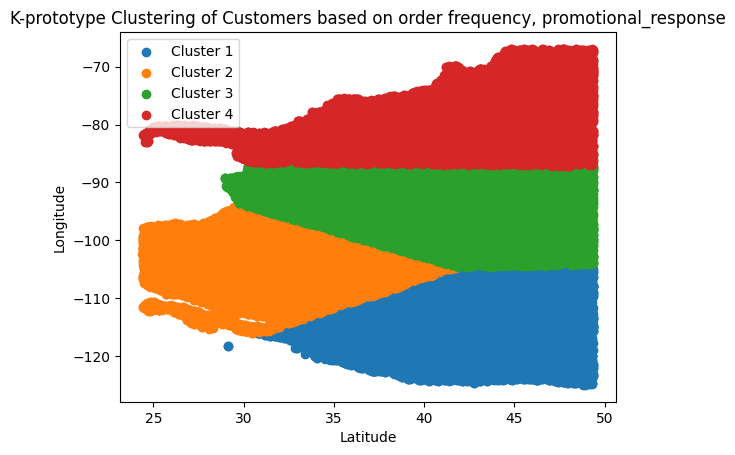

In [ ]:
selected_features5 = ['latitude','longitude','order_frequency','promotional_response']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features5].values, categorical=[3])
df2['cluster5'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster5'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency, promotional_response')
plt.legend()
plt.show()

In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'lightgray'),
      popup = f"{location_name}"
  ).add_to(m)

m.save('map5.html')
m

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6743, ncost: 3457292.009913362
Run: 1, iteration: 2/100, moves: 2955, ncost: 3388965.842402657
Run: 1, iteration: 3/100, moves: 2671, ncost: 3318690.0965861655
Run: 1, iteration: 4/100, moves: 2511, ncost: 3275238.3409996815
Run: 1, iteration: 5/100, moves: 1621, ncost: 3260983.07036477
Run: 1, iteration: 6/100, moves: 1079, ncost: 3252879.9371108683
Run: 1, iteration: 7/100, moves: 1040, ncost: 3244361.2636537533
Run: 1, iteration: 8/100, moves: 952, ncost: 3237885.302827236
Run: 1, iteration: 9/100, moves: 864, ncost: 3233442.842384596
Run: 1, iteration: 10/100, moves: 606, ncost: 3231361.373039454
Run: 1, iteration: 11/100, moves: 549, ncost: 3229241.4249616982
Run: 1, iteration: 12/100, moves: 695, ncost: 3222288.2447704826
Run: 1, iteration: 13/100, moves: 1097, ncost: 3207171.646808973
Run: 1, 

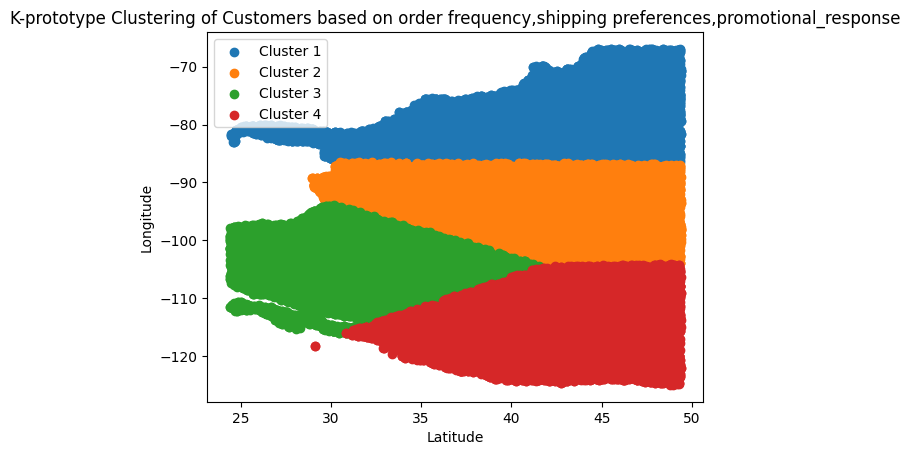

In [ ]:
selected_features6 = ['latitude','longitude','order_frequency','shipping_preferences','promotional_response']
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features6].values, categorical=[3,4])
df2['cluster6'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster6'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency,shipping preferences,promotional_response')
plt.legend()
plt.show()



In [ ]:
cluster_centroids = kproto.cluster_centroids_
for cluster_id, (lat, lon, order_freq, returns_rate, shipping_pref, promo_resp) in enumerate(cluster_centroids):
    print(f"Cluster {cluster_id} Centroid:")
    print(f"Latitude: {lat}")
    print(f"Longitude: {lon}")
    print(f"Order Frequency: {order_freq}")
    print(f"Returns Rate: {returns_rate}")
    print(f"Shipping Preferences: {shipping_pref}")
    print(f"Promotional Response: {promo_resp}")
    print("\n")

Cluster 0 Centroid:
Latitude: 42.177051923100855
Longitude: -114.94575868728953
Order Frequency: 10.016468690136845
Returns Rate: 0.2861593886125636
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 1 Centroid:
Latitude: 31.49927954420469
Longitude: -104.62835910929554
Order Frequency: 10.006288875213476
Returns Rate: 0.2896842340273143
Shipping Preferences: 0.0
Promotional Response: 1.0


Cluster 2 Centroid:
Latitude: 41.13443140295636
Longitude: -79.31996632134131
Order Frequency: 9.993459951431056
Returns Rate: 0.28734418005972495
Shipping Preferences: 2.0
Promotional Response: 0.0


Cluster 3 Centroid:
Latitude: 40.82262543702477
Longitude: -94.43708312998348
Order Frequency: 10.021709647727448
Returns Rate: 0.2865707581365526
Shipping Preferences: 1.0
Promotional Response: 1.0




In [ ]:
#map
# m = folium.Map(zoom_start = 6)
for i in range(k):
  coordinates = [cluster_centroids[i][0],cluster_centroids[i][1]]

  geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

  folium.Marker(
      location = coordinates,
      icon = folium.Icon(color = 'yellow'),
      popup = f"{location_name}"
  ).add_to(m)

m.save('map6.html')
m